<a href="https://colab.research.google.com/github/akhileshchoudhary1994/IPL-T-20-Cricket-analysis/blob/main/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
sns.set(rc={'figure.figsize':(30,21)})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_directory = '/content/drive/My Drive/'
team_csv= pd.read_csv(working_directory + 'teams.csv')
team_csv.head(2)

,team1
0,Pune Warriors
1,Kolkata Knight Riders


In [4]:
delievery_csv=pd.read_csv(working_directory + 'deliveries.csv')
delievery_csv["dismissal_kind"].value_counts()


caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [ ]:
matches_csv=pd.read_csv(working_directory + 'matches.csv')
matches_csv.head(2)



,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [ ]:
teamwise_home_and_away=pd.read_csv(working_directory + 'teamwise_home_and_away.csv')

In [ ]:
mostrun_average_strikerate=pd.read_csv(working_directory + 'most_runs_average_strikerate.csv')

In [ ]:
players=pd.read_excel(working_directory + 'Players.xlsx')
players

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India


In [ ]:
team_csv

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [ ]:
delievery_csv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
l=matches_csv[matches_csv["Season"]=="IPL-2017"]
l[l["team1"]=="Sunrisers Hyderabad"]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
18,19,IPL-2017,Hyderabad,17-04-2017,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN
20,21,IPL-2017,Hyderabad,19-04-2017,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
24,25,IPL-2017,Pune,22-04-2017,Sunrisers Hyderabad,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,6,MS Dhoni,Maharashtra Cricket Association Stadium,AY Dandekar,A Deshmukh,NaN
31,32,IPL-2017,Chandigarh,28-04-2017,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,CK Nandan,NaN
35,36,IPL-2017,Hyderabad,30-04-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi,NaN
38,39,IPL-2017,Delhi,02-05-2017,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN


In [ ]:

teamwise_home_and_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [ ]:
mostrun_average_strikerate

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [ ]:
players

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India


In [ ]:
matches_csv.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


The most runs scorer in IPL-2008 are : batsman
SE Marsh         616
G Gambhir        534
ST Jayasuriya    514
SR Watson        472
GC Smith         441
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2009 are : batsman
ML Hayden         572
AC Gilchrist      495
AB de Villiers    465
SK Raina          434
TM Dilshan        418
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2010 are : batsman
SR Tendulkar    618
JH Kallis       572
SK Raina        528
SC Ganguly      493
M Vijay         458
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2011 are : batsman
CH Gayle        608
V Kohli         557
SR Tendulkar    553
SE Marsh        504
MEK Hussey      492
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2012 are : batsman
CH Gayle     733
G Gambhir    590
S Dhawan     569
AM Rahane    560
V Sehwag     495
Name: batsman_runs, dtype: int64
The most runs scorer in IPL-2013 are : batsman
MEK Hussey    733
CH Gayle      720
V Kohli       639

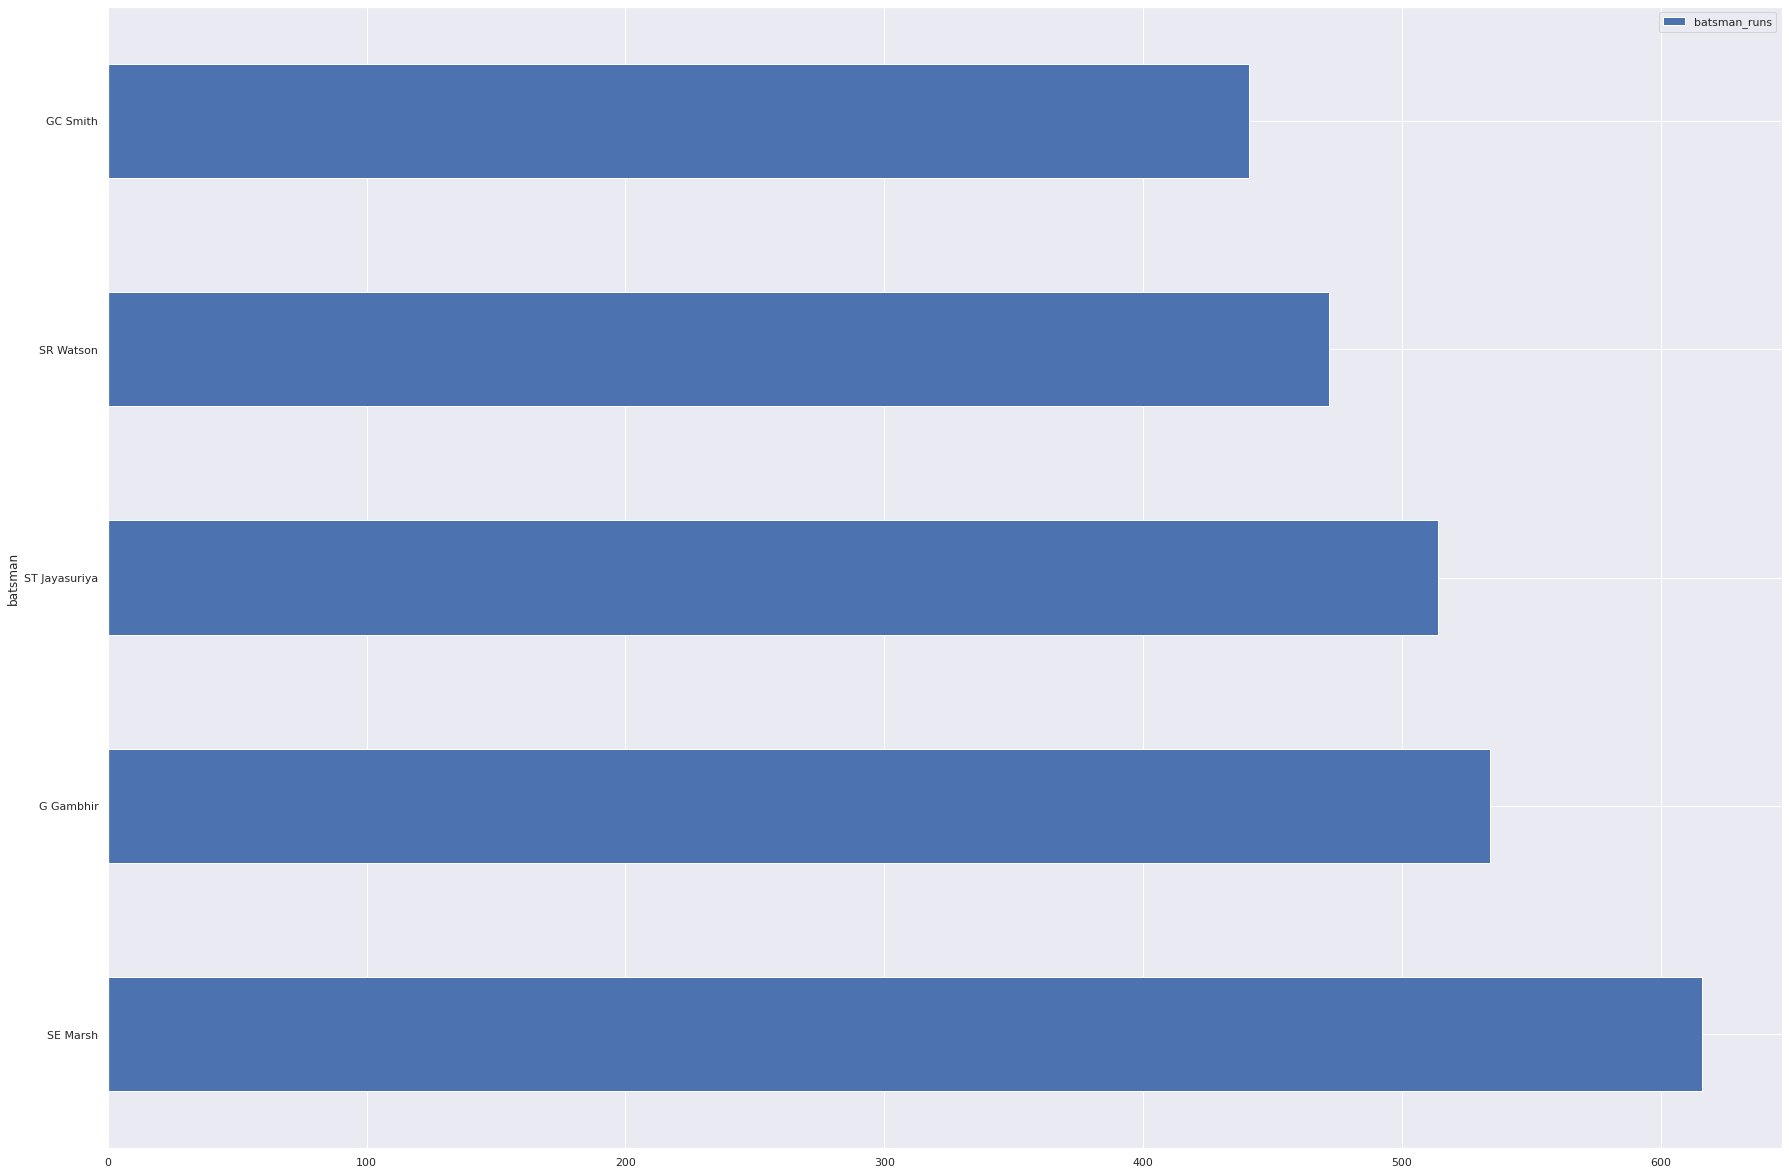

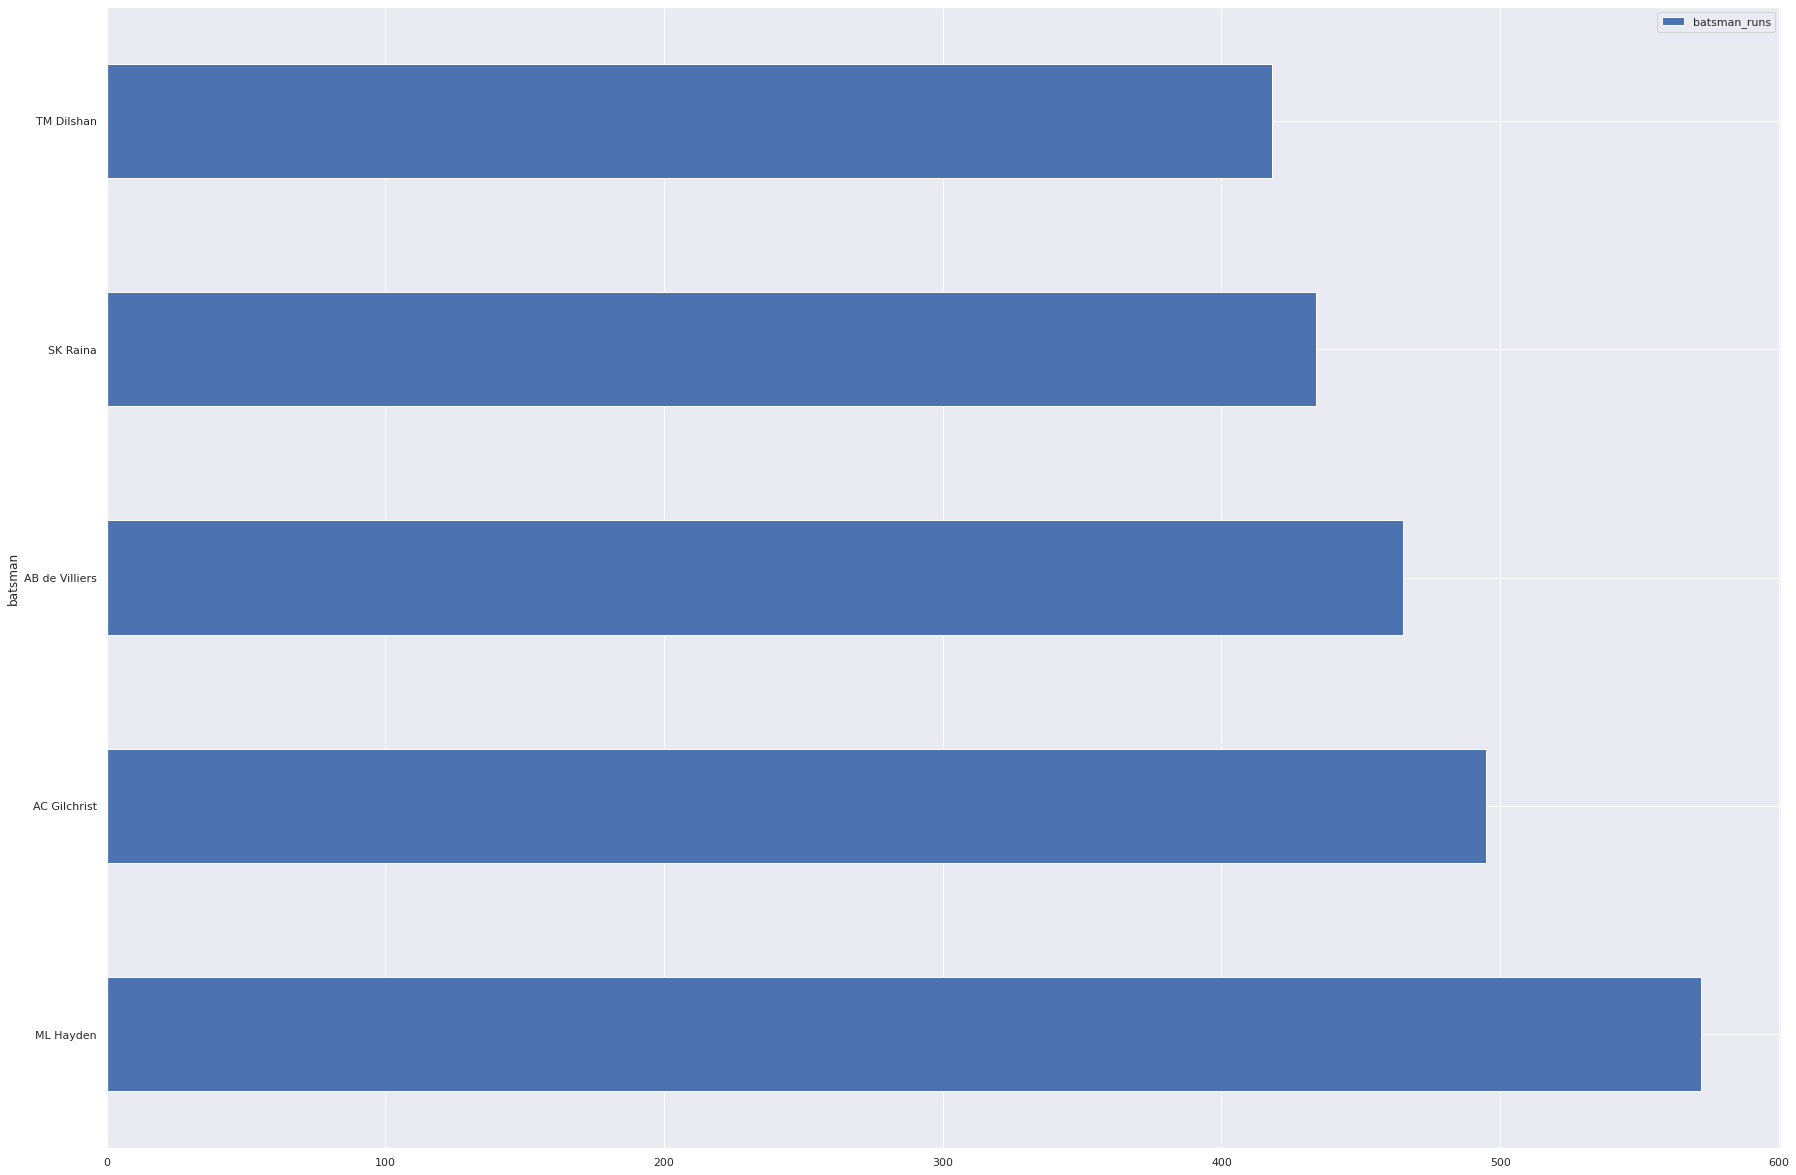

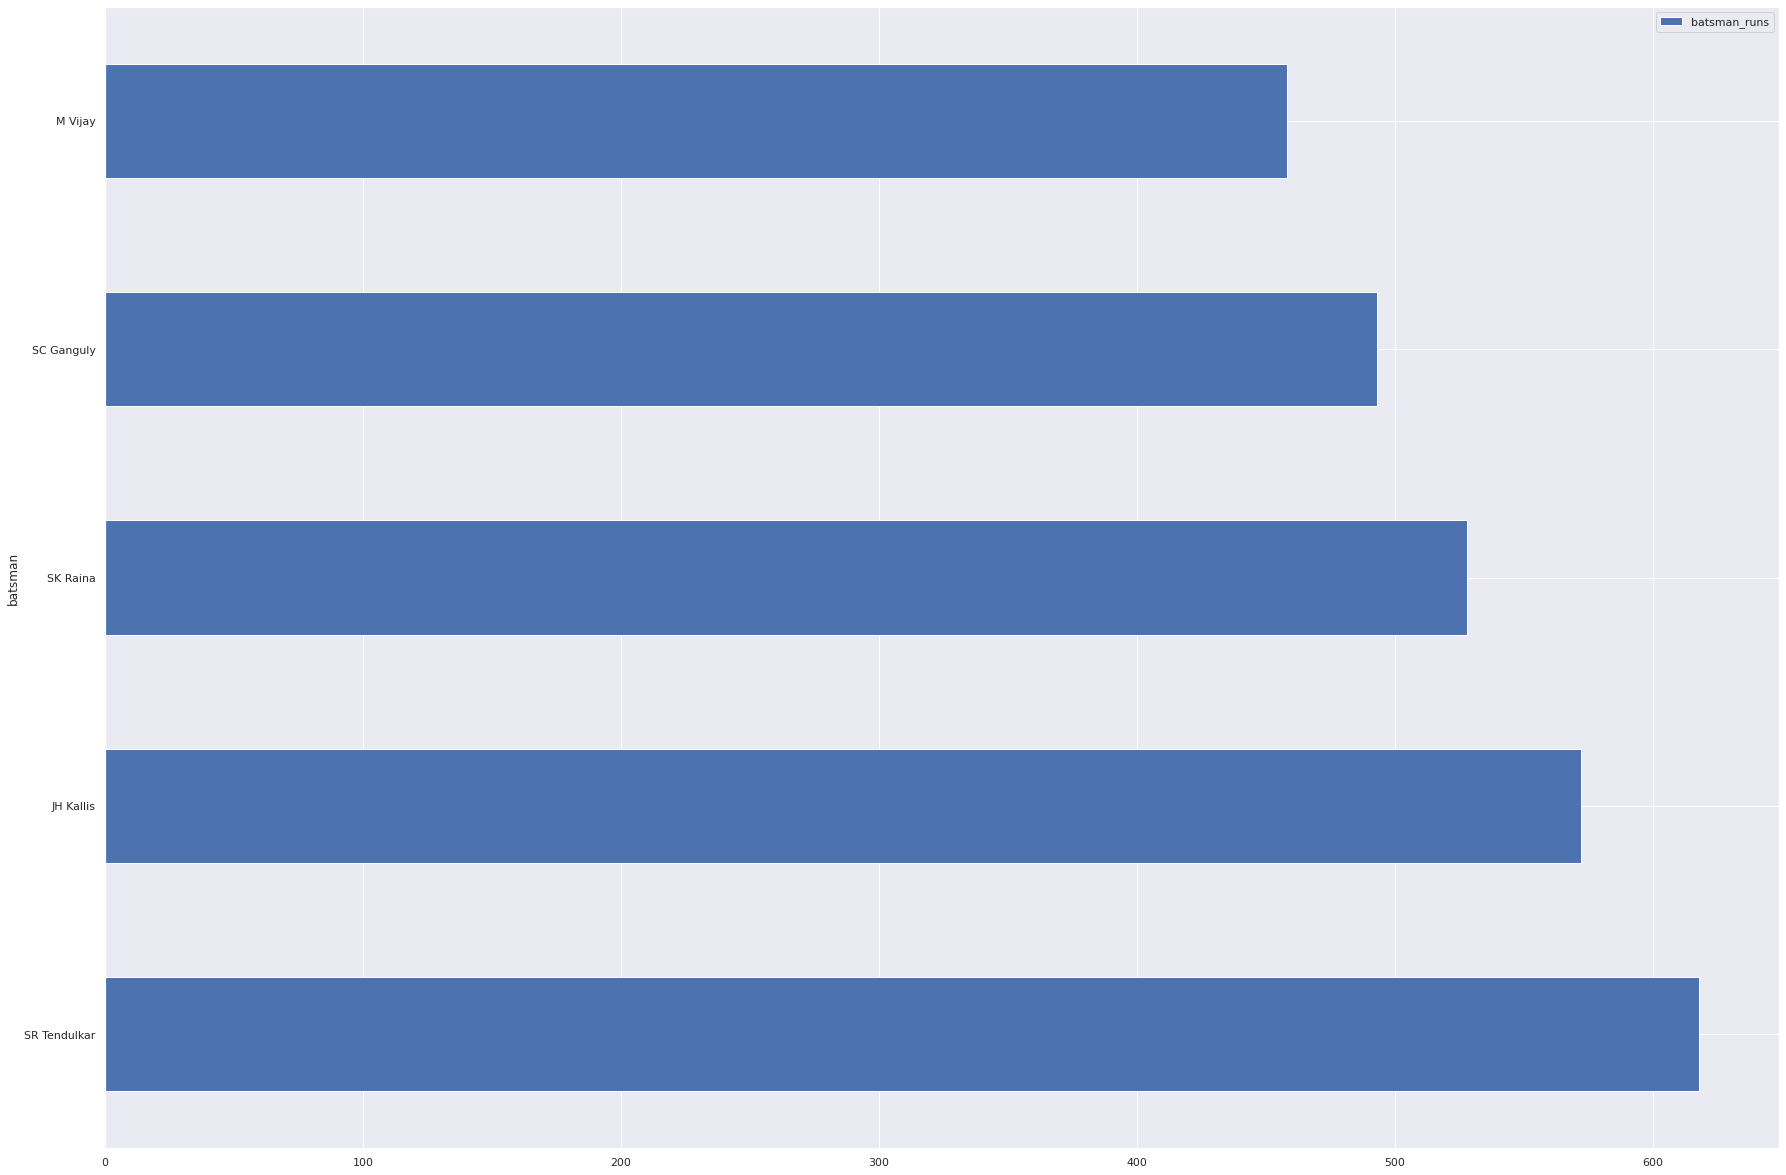

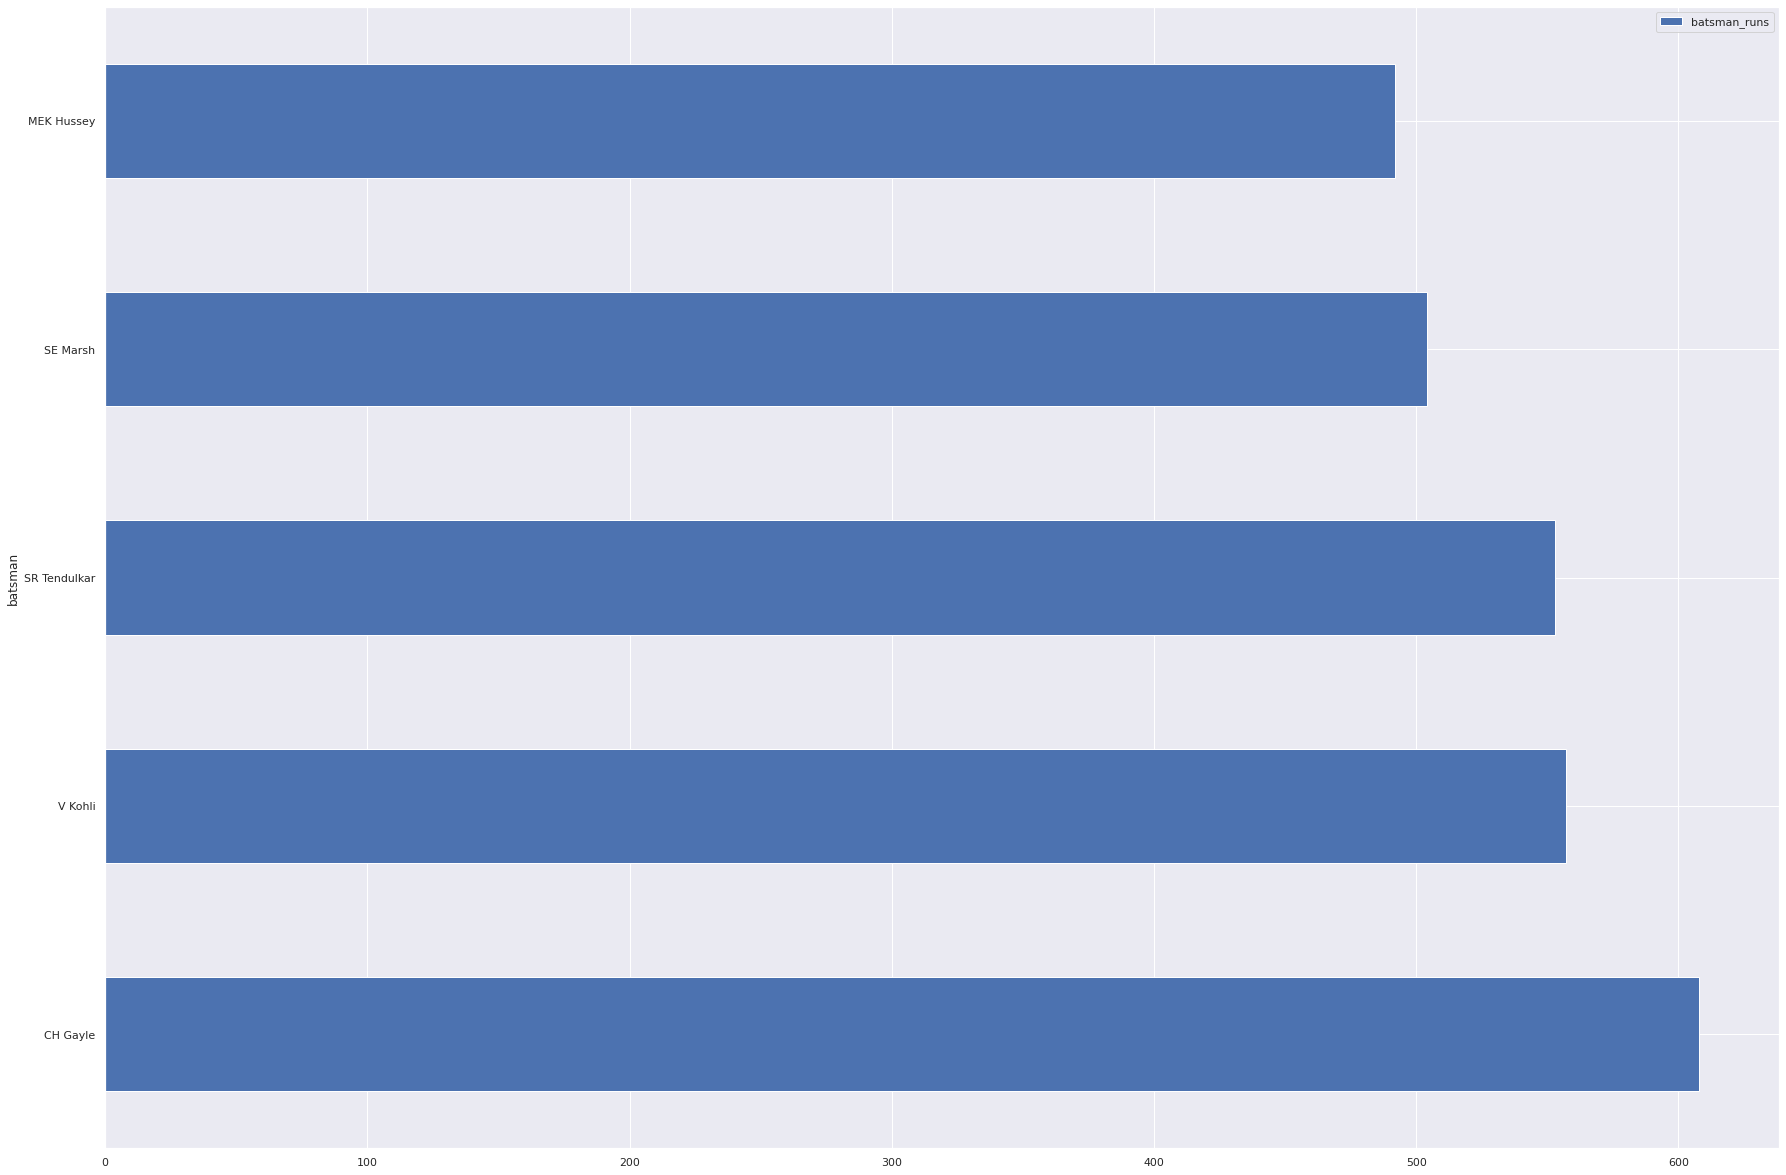

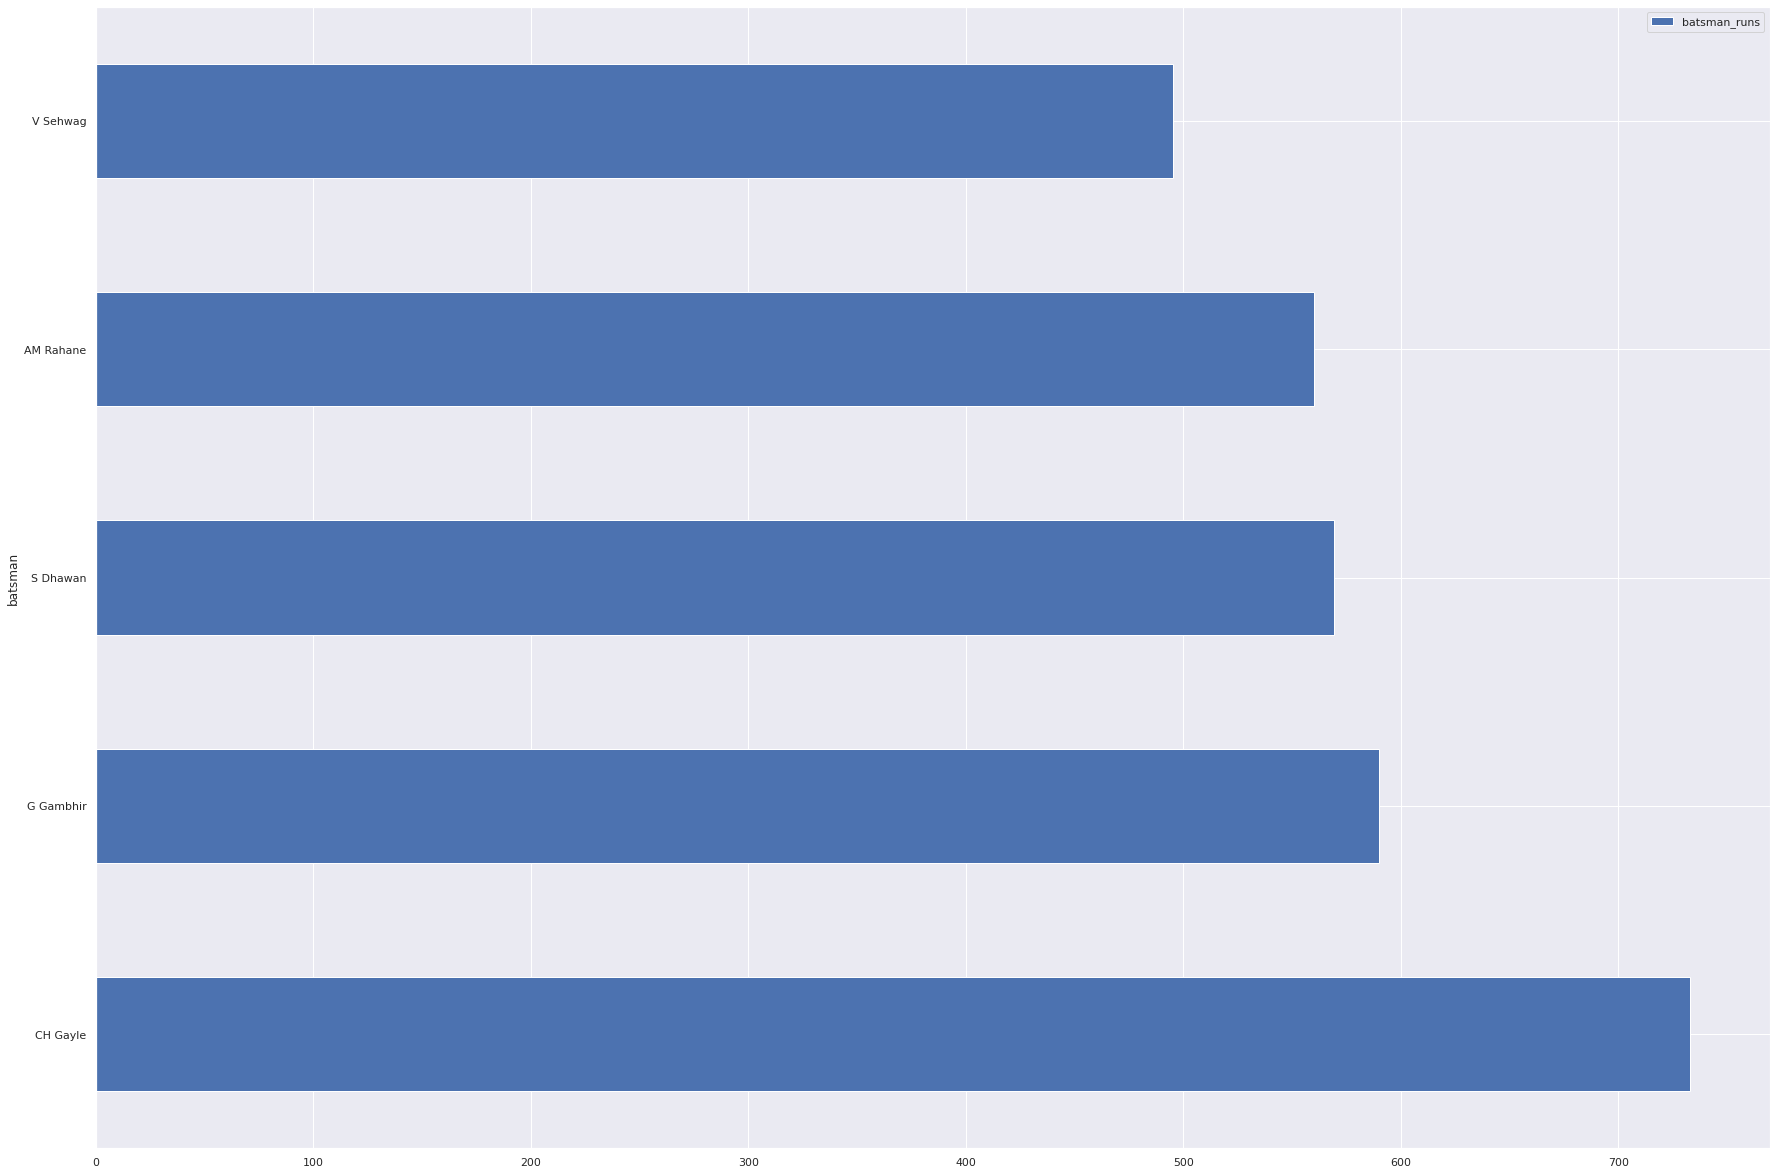

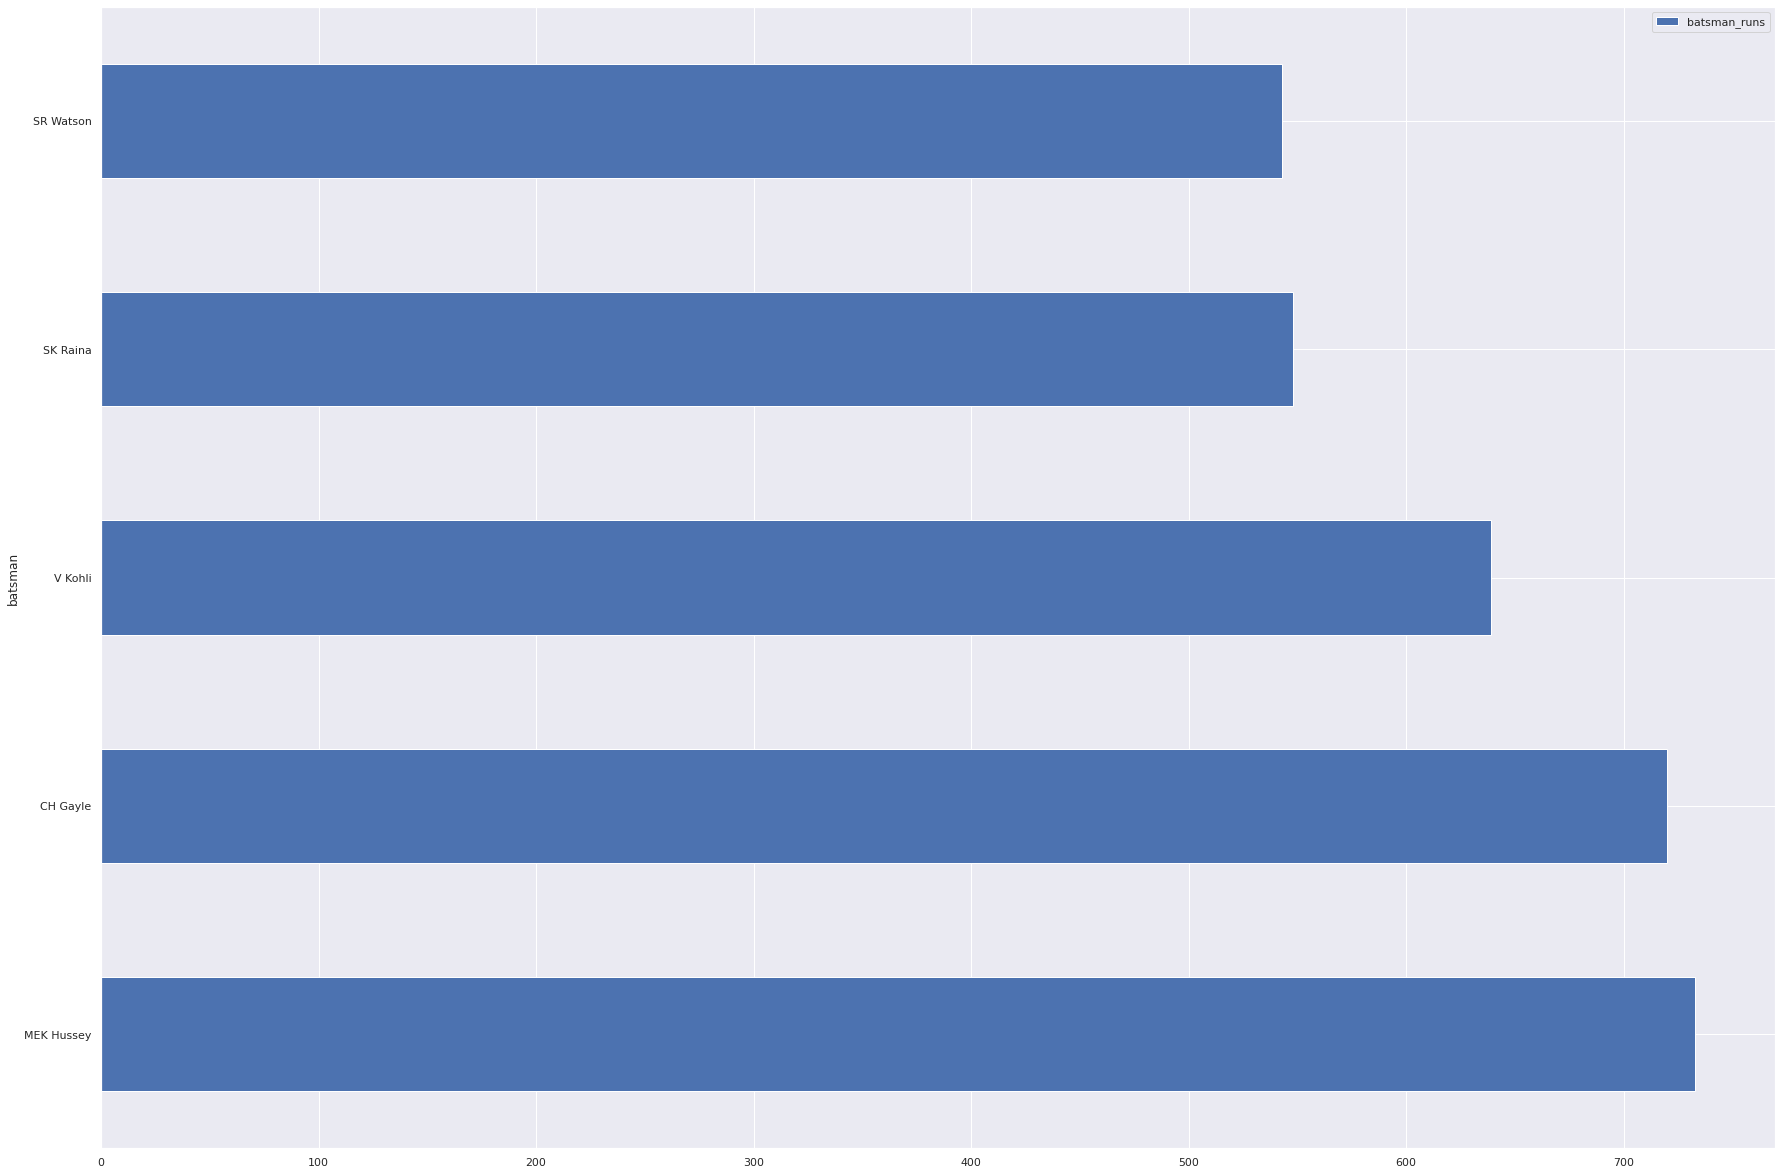

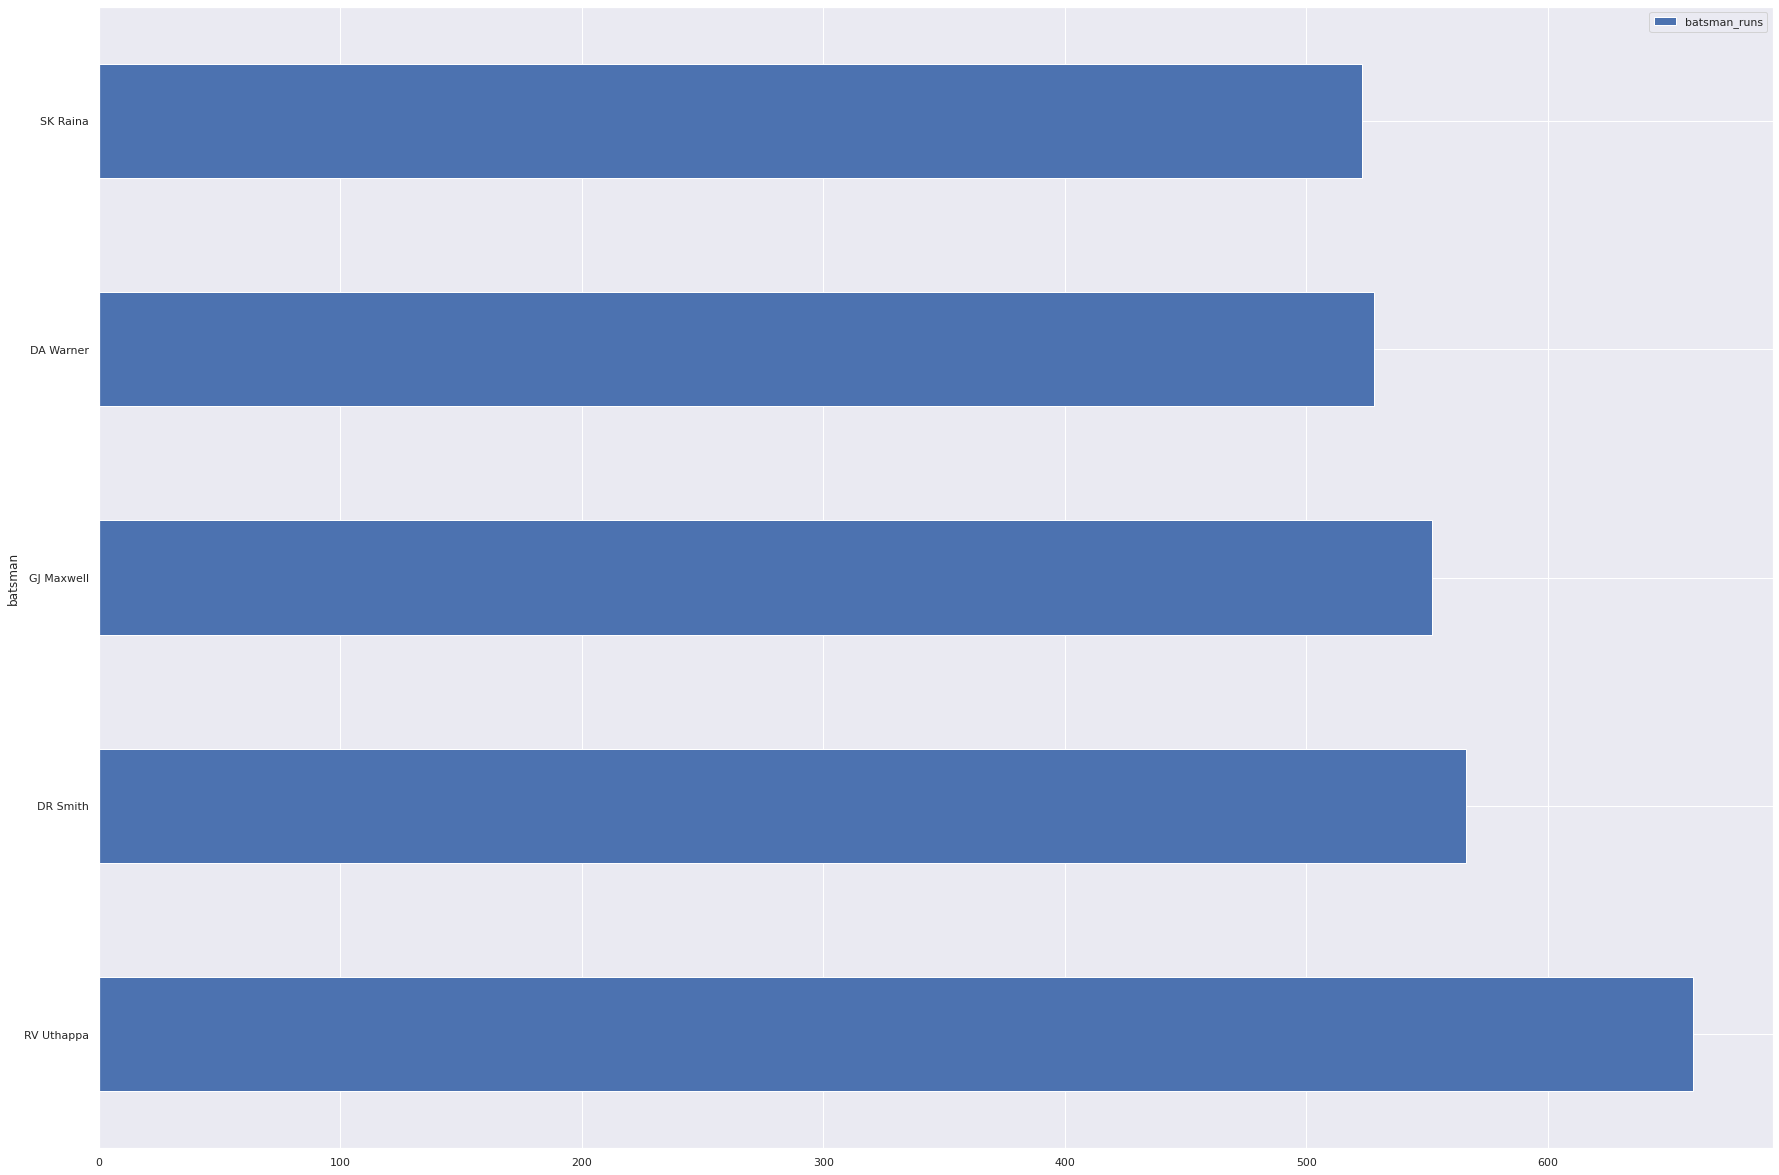

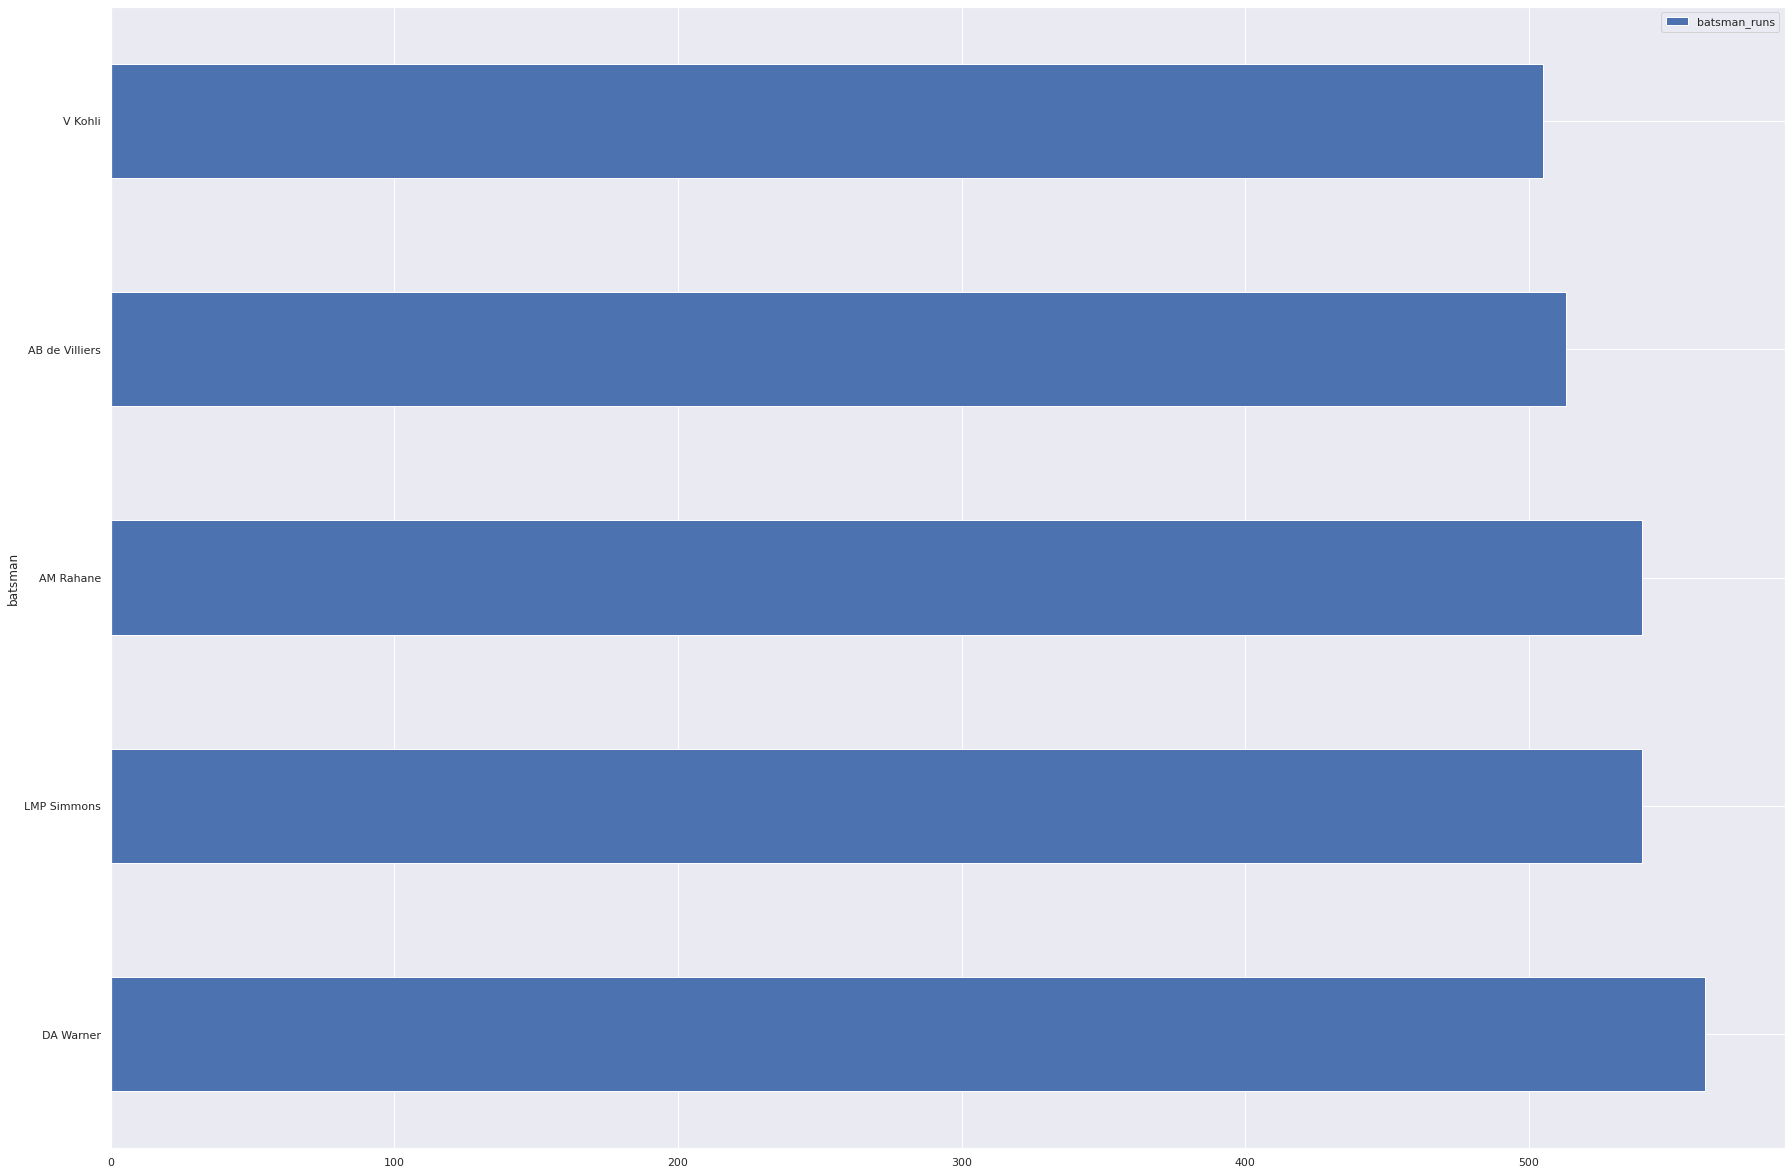

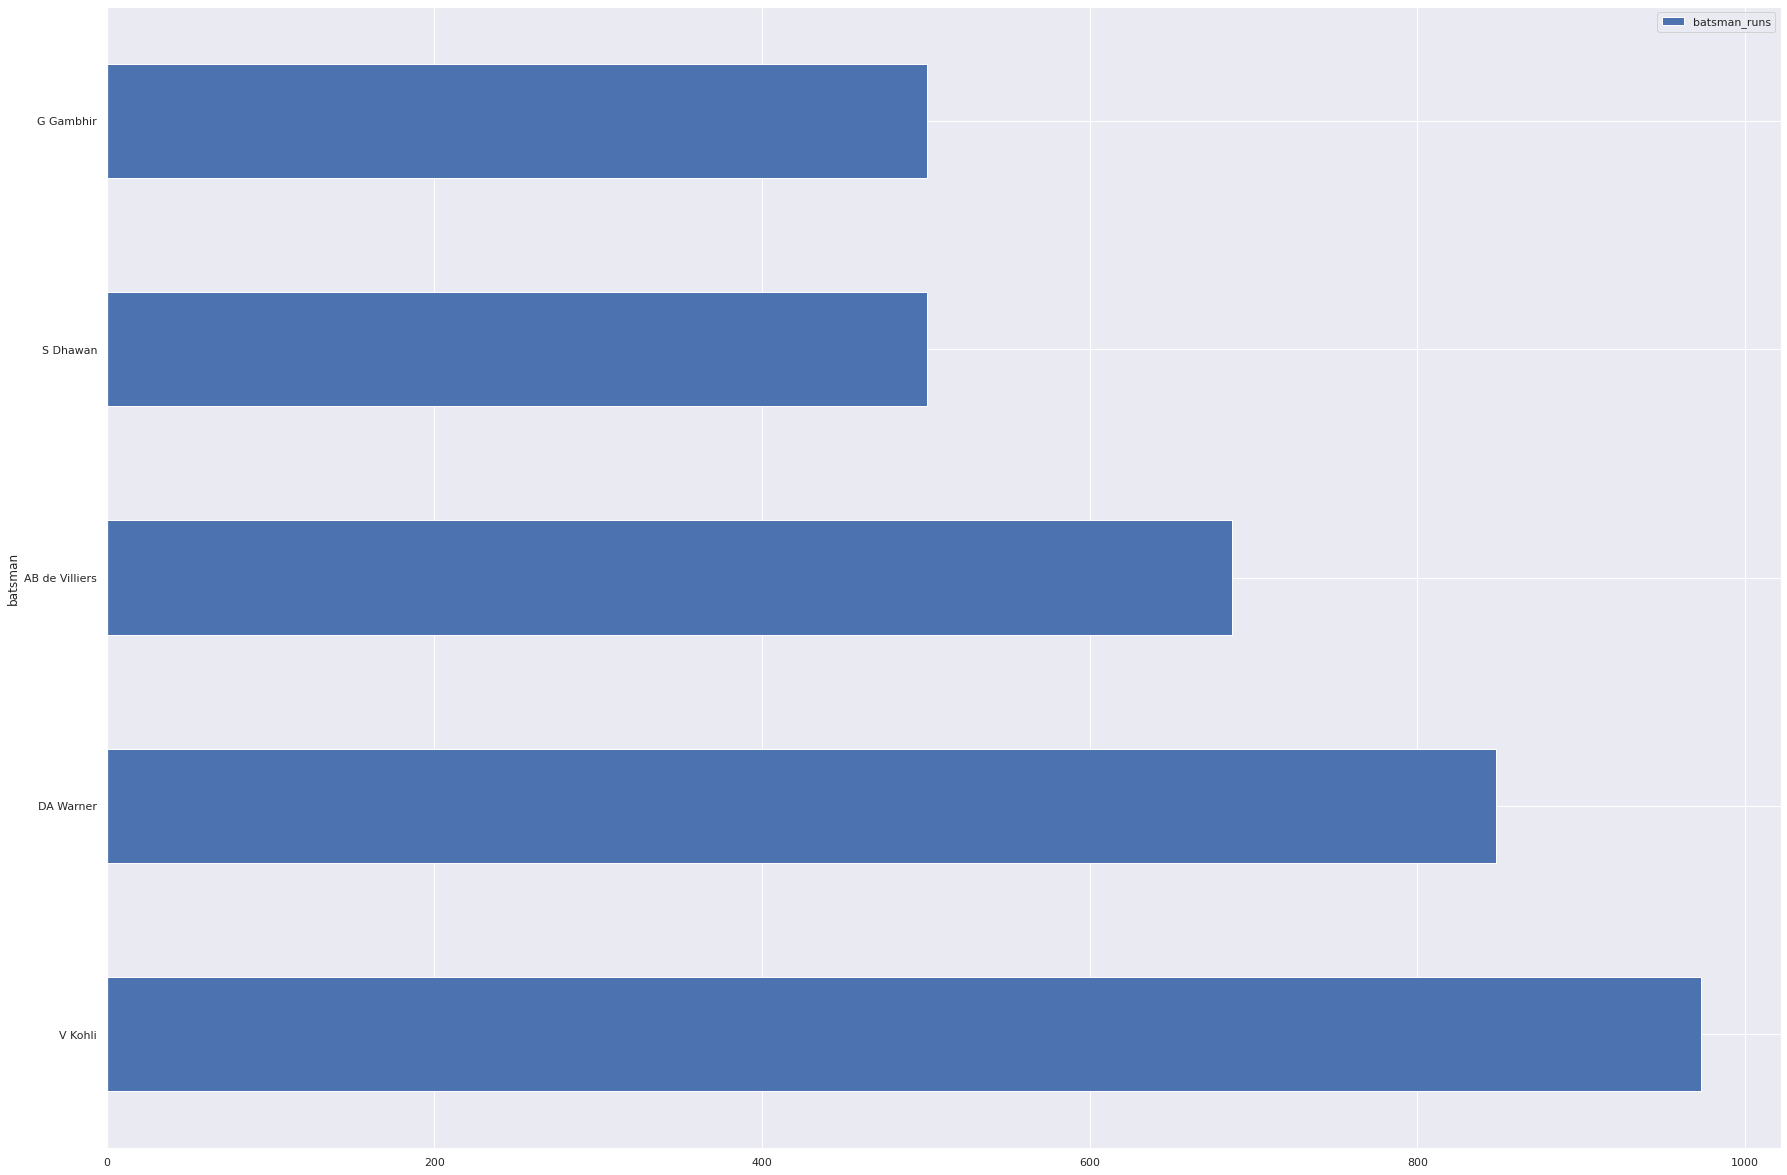

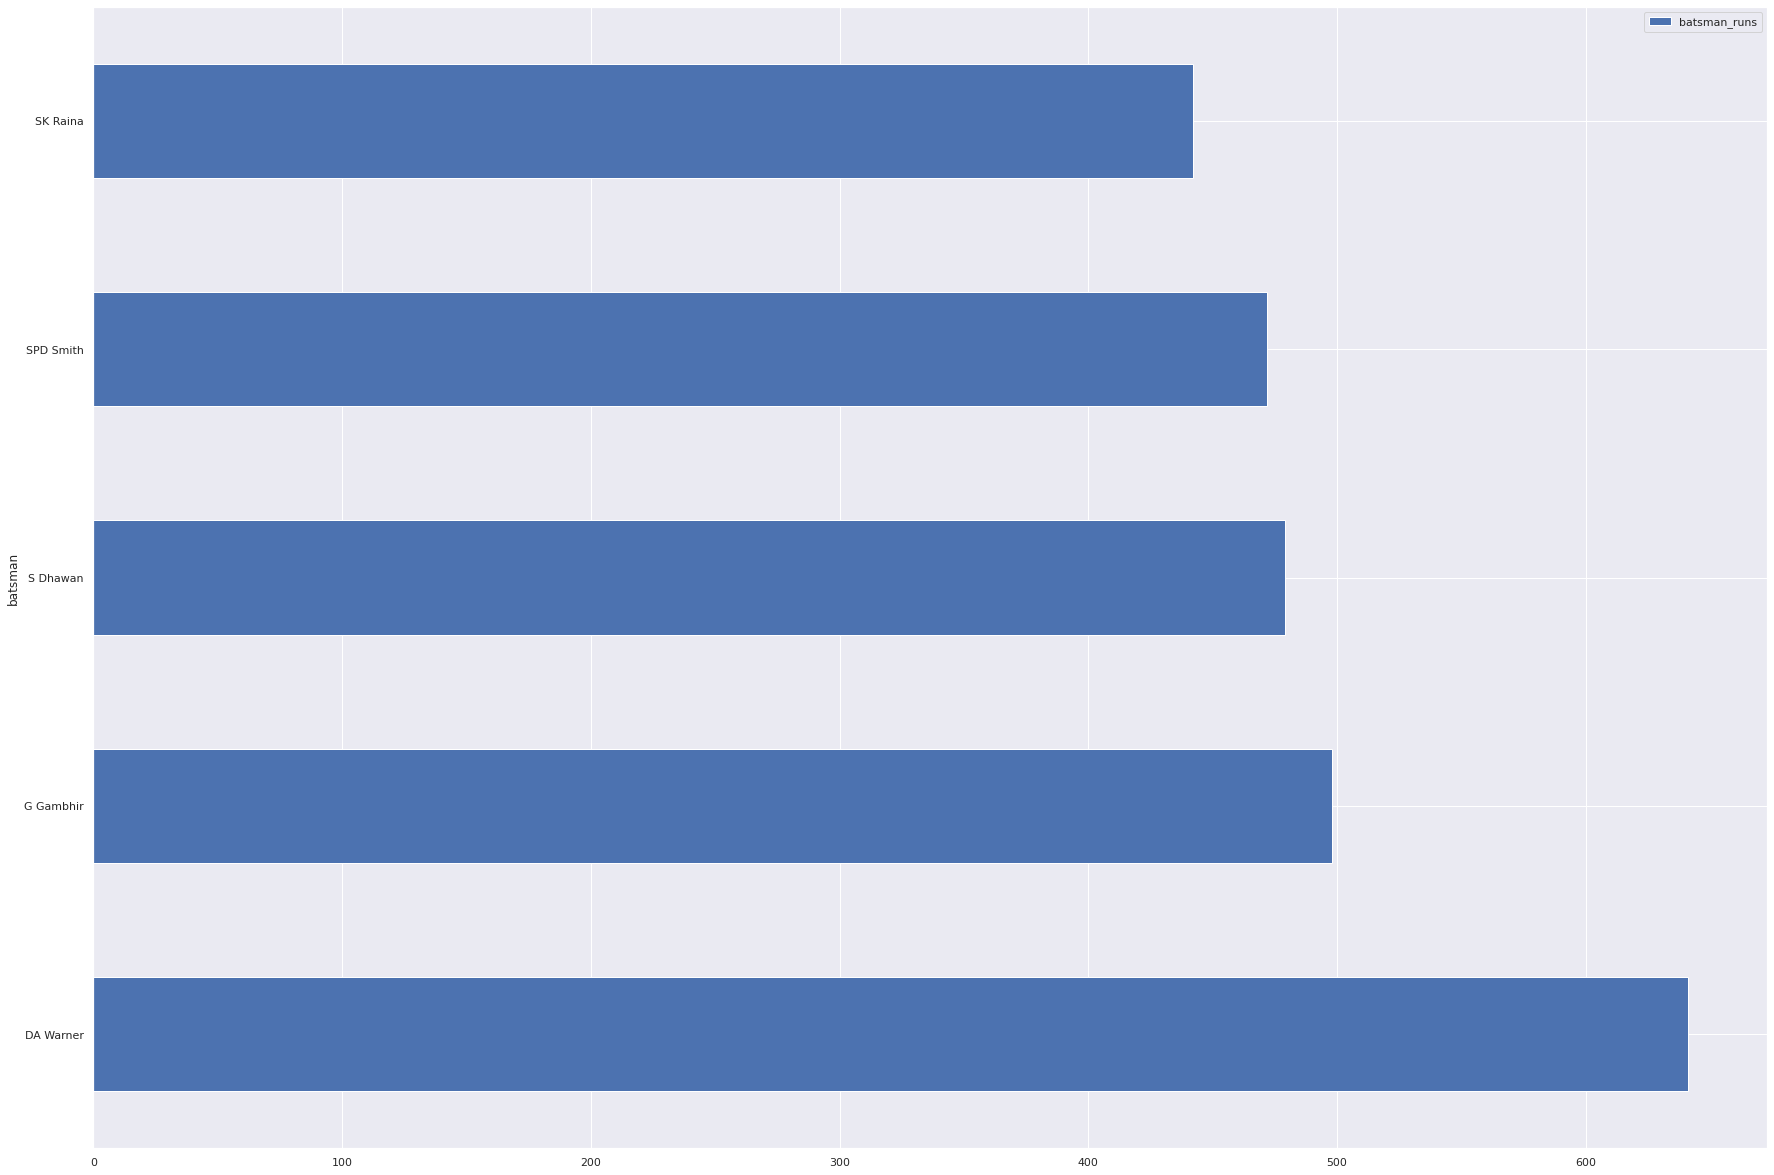

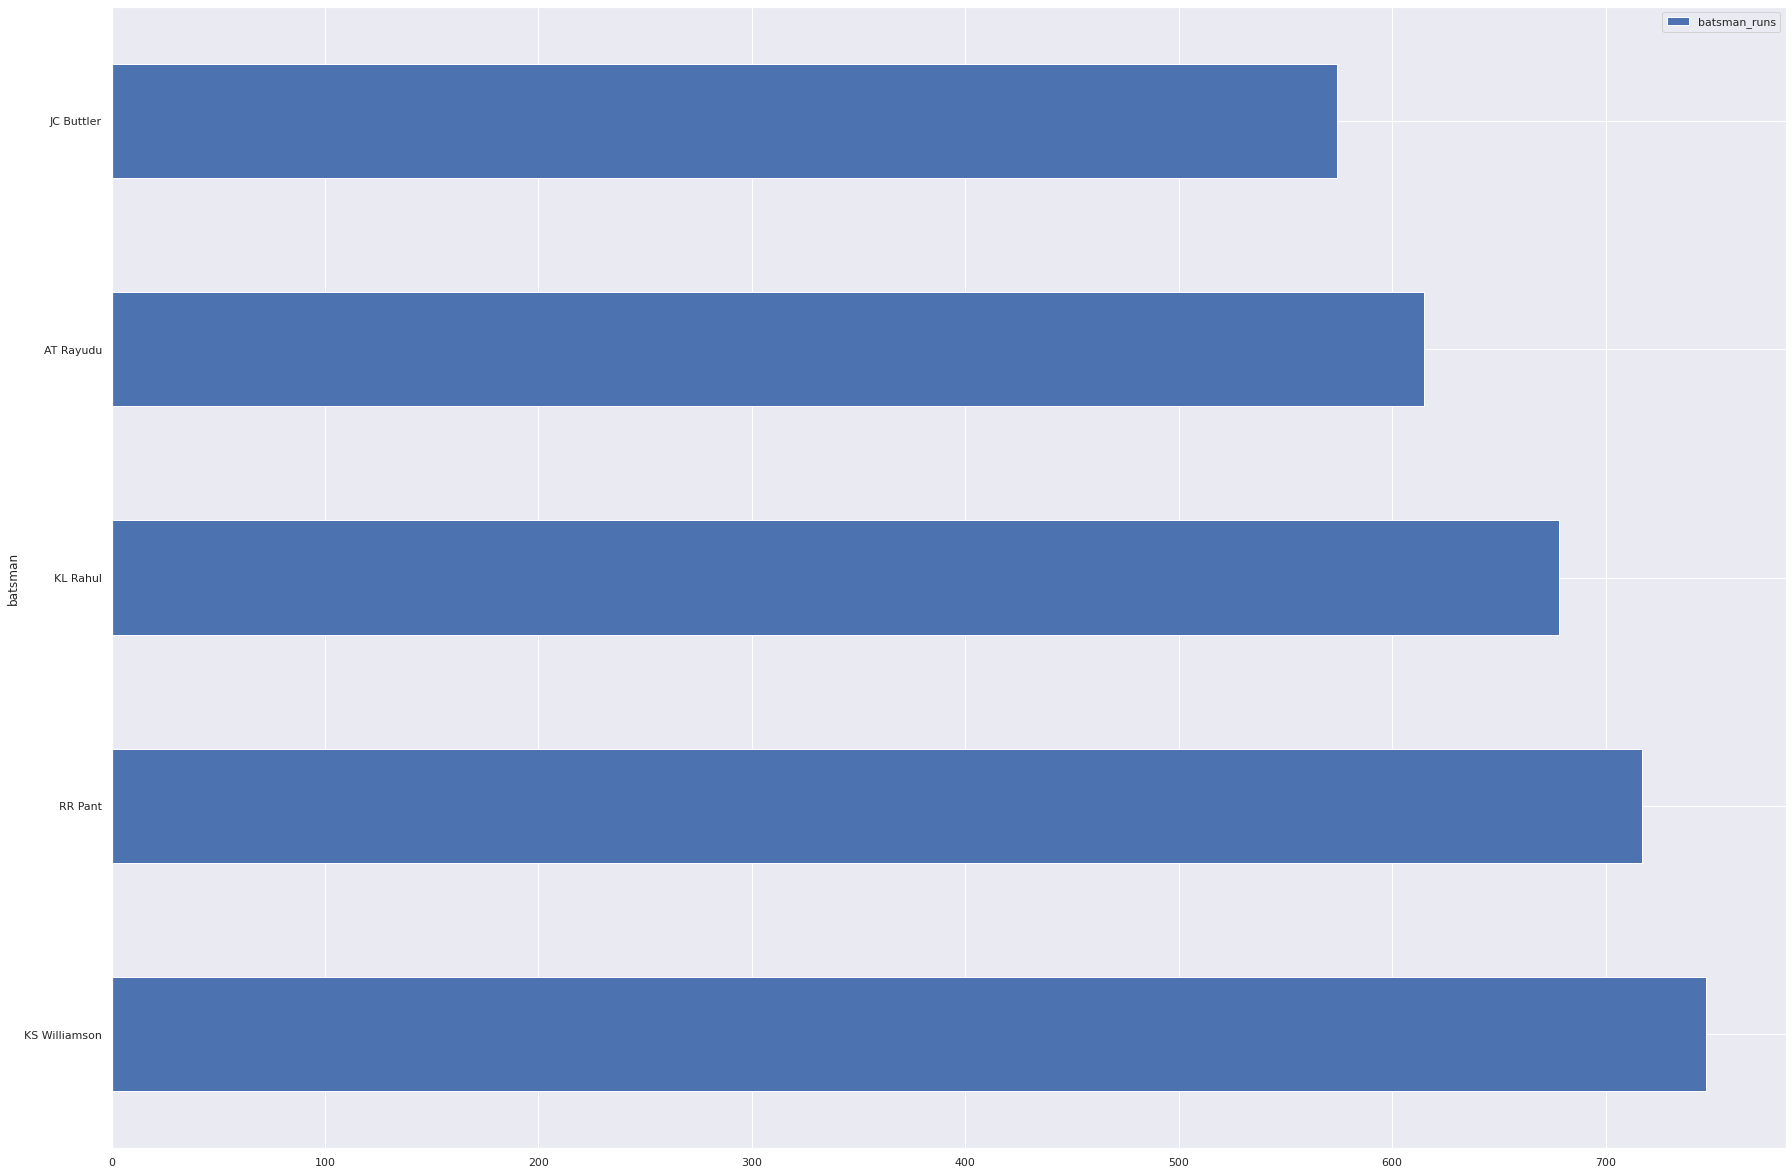

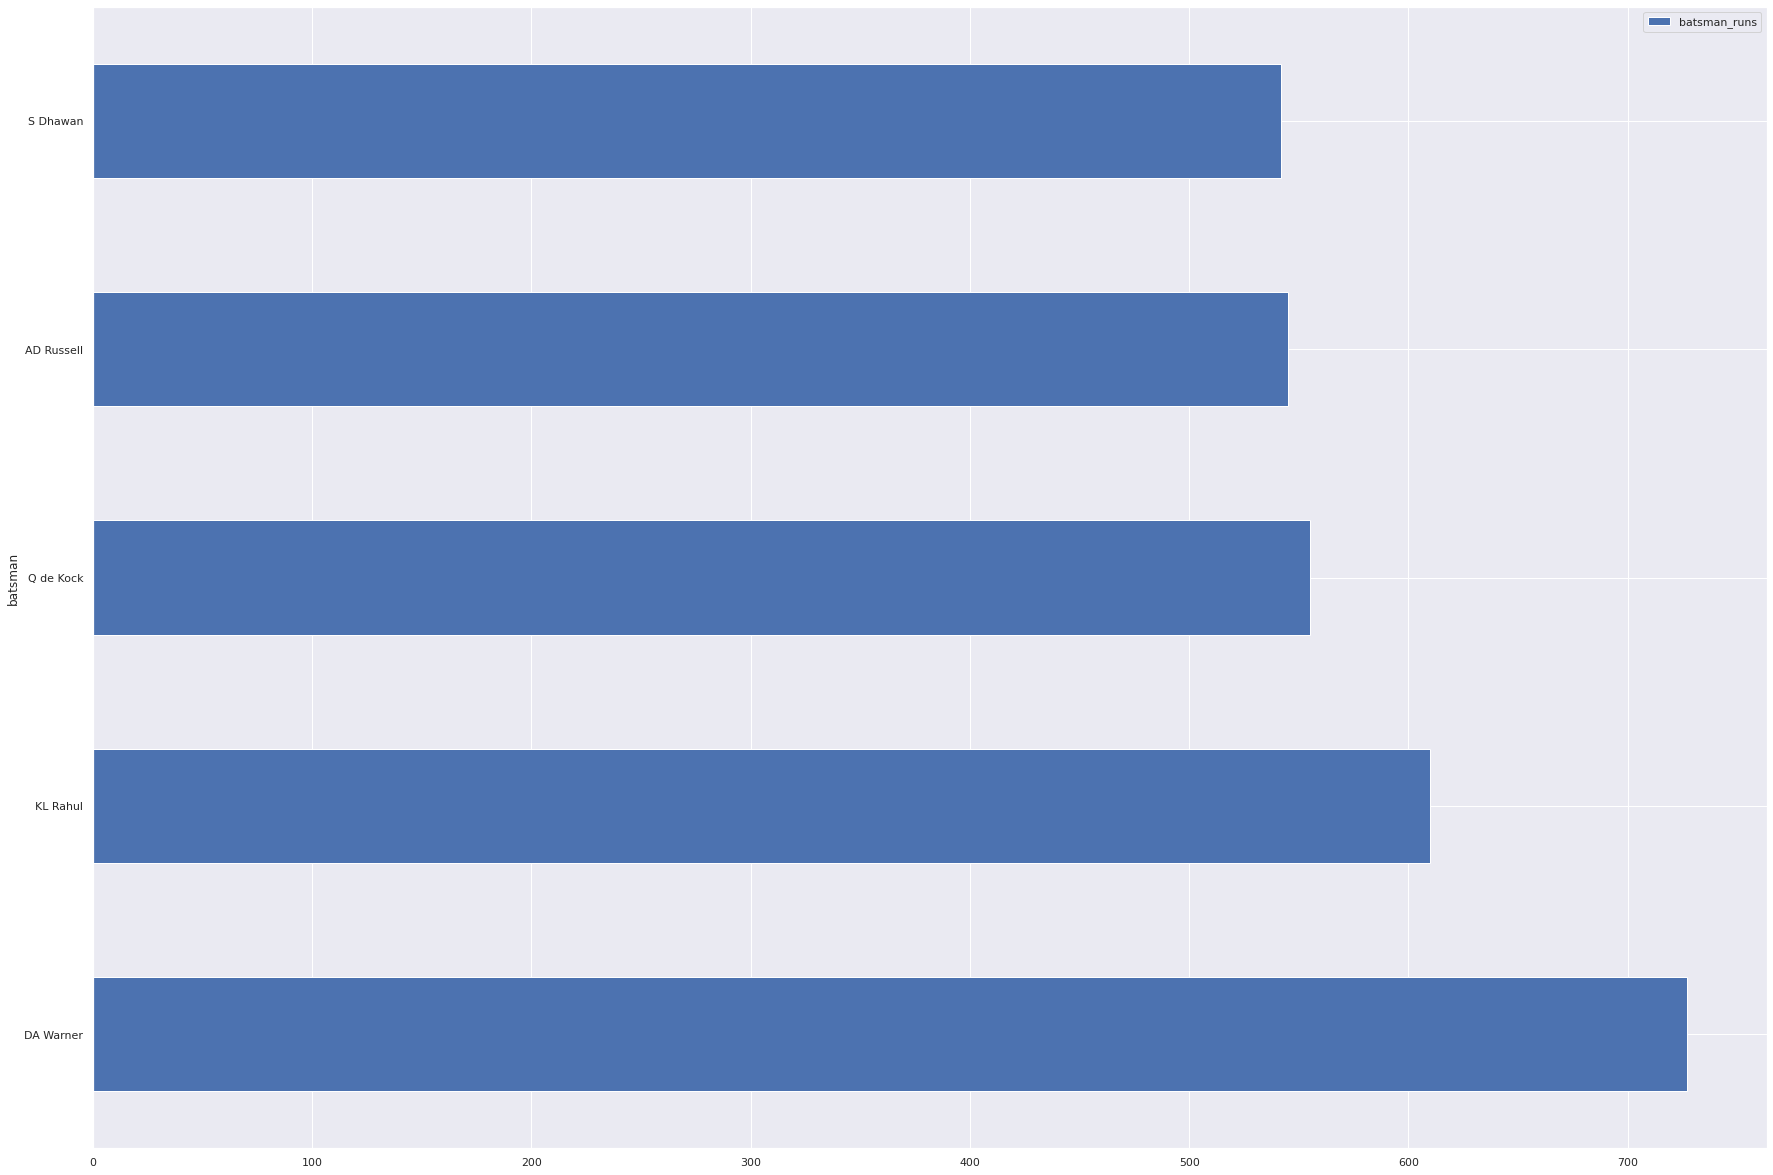

In [ ]:

# merged delievery and matches for getting particular season 
def most_runs_scored(x):
  merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
  #filtering specific for the particular season and evaluation total runs scored by each batsman
  merge_particular_season=merging_delievery_matches[merging_delievery_matches["Season"]==x]
  return(merge_particular_season.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False))[:5]

l=["IPL-2008","IPL-2009","IPL-2010","IPL-2011","IPL-2012","IPL-2013","IPL-2014","IPL-2015","IPL-2016","IPL-2017","IPL-2018","IPL-2019"]
for i in l:
  print(f'The most runs scorer in {i} are : {most_runs_scored(i)}')
  import matplotlib.pyplot as plt
  from matplotlib.ticker import StrMethodFormatter
  pd.DataFrame(most_runs_scored(i)).plot(kind="barh")

#('Mumbai Indians', 'Kochi Tuskers Kerala', 'Gujarat Lions', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Delhi Capitals', 'Pune Warriors', 'Deccan Chargers', 'Rising Pune Supergiant', 'Royal Challengers Bangalore')

In [ ]:
# Evaluating total winning percentage for the team in particular season
# total_number of matches played by sunrises hyderabad in 2017 season
total_matches_sunrises=len(matches_csv[((matches_csv["team1"]=="Sunrisers Hyderabad") | (matches_csv["team2"]=="Sunrisers Hyderabad")) & (matches_csv["Season"]=="IPL-2017")])

# now matches winned by sunrises hyderabad for evaluating winning percentage

total_winned_matches_sunrises=len(matches_csv[(matches_csv["Season"]=="IPL-2017") & (matches_csv["winner"]=="Sunrisers Hyderabad") ])

print((total_winned_matches_sunrises/total_matches_sunrises)*100)


57.14285714285714


In [ ]:
def winning_percentage(x,y):
  try:
    total_matches=len(matches_csv[((matches_csv["team1"]==y) | (matches_csv["team2"]==y)) & (matches_csv["Season"]==x)])
    # now matches winned by sunrises hyderabad for evaluating winning percentage

    total_winned_matches=len(matches_csv[(matches_csv["Season"]==x) & (matches_csv["winner"]==y) ])

    return((total_winned_matches/total_matches)*100)
  except:
    print(f'{y} is not present in {x} ')

     # where x is the season and y is the team in that season
winning_percentage(x="IPL-2008",y="Rajasthan Royals")
  

81.25

In [ ]:

From itertools import product


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
l=["IPL-2008","IPL-2009","IPL-2010","IPL-2011","IPL-2012","IPL-2013","IPL-2014","IPL-2015","IPL-2016","IPL-2017","IPL-2018","IPL-2019"]


In [ ]:
def most_wicketer(x):
  merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
  #filtering specific for the particular season and evaluation total runs scored by each batsman
  merge_particular_season=merging_delievery_matches[merging_delievery_matches["Season"]==x]
  wickets=merge_particular_season[(merge_particular_season["dismissal_kind"]=="caught") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="lbw") | (merge_particular_season["dismissal_kind"]=="stumped") | (merge_particular_season["dismissal_kind"]=="caught and bowled") | (merge_particular_season["dismissal_kind"]=="hit wicket")]
  return(wickets.groupby("bowler")["bowler"].count().sort_values(ascending=False)[:5])   
 

The most wicket taking  bowlers IPL-2008 are : bowler
Sohail Tanvir    22
S Sreesanth      19
SK Warne         19
SR Watson        17
JA Morkel        17
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2009 are : bowler
RP Singh      23
A Kumble      21
A Nehra       19
SL Malinga    18
PP Ojha       18
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2010 are : bowler
PP Ojha            21
A Kumble           17
A Mishra           17
Harbhajan Singh    17
M Muralitharan     16
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2011 are : bowler
SL Malinga    28
MM Patel      22
S Aravind     21
R Ashwin      20
A Mishra      19
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2012 are : bowler
M Morkel         25
SP Narine        24
SL Malinga       22
UT Yadav         19
R Vinay Kumar    19
Name: bowler, dtype: int64
The most wicket taking  bowlers IPL-2013 are : bowler
DJ Bravo           32
JP Faulkner        28
MG Johnson       

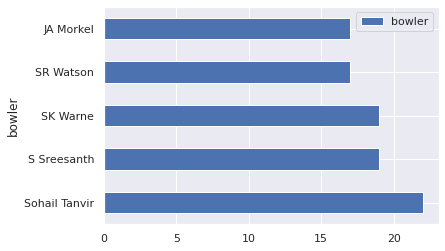

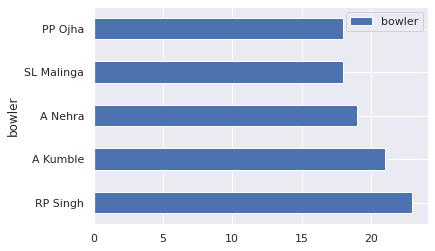

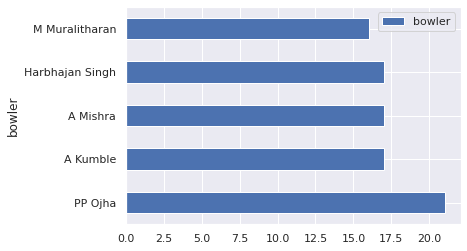

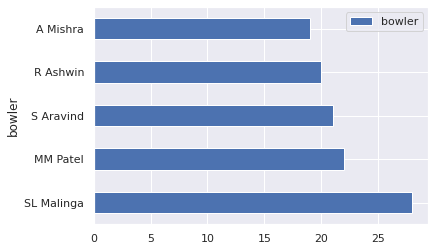

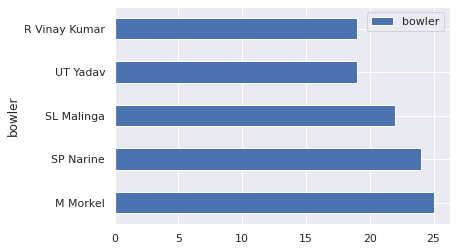

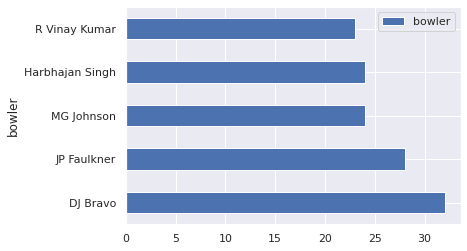

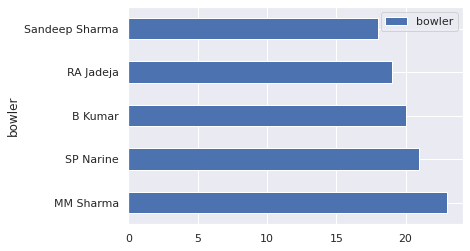

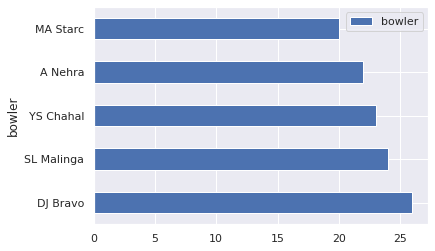

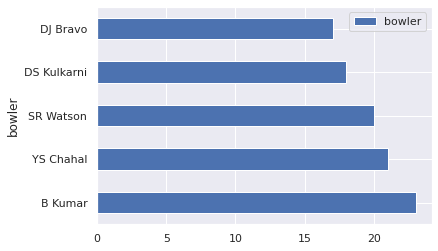

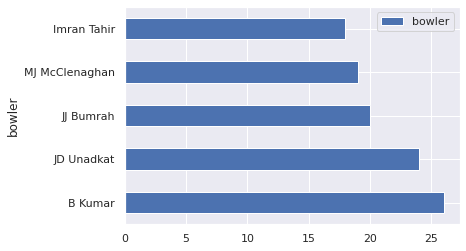

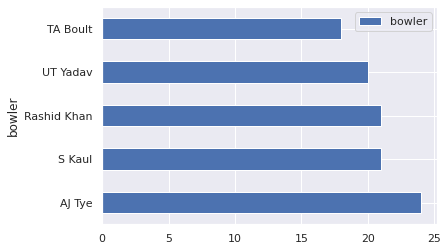

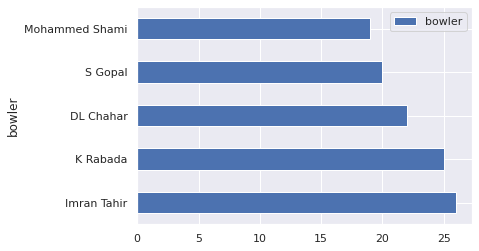

In [ ]:
l=["IPL-2008","IPL-2009","IPL-2010","IPL-2011","IPL-2012","IPL-2013","IPL-2014","IPL-2015","IPL-2016","IPL-2017","IPL-2018","IPL-2019"]
for i in l:
  import matplotlib.pyplot as plt
  from matplotlib.ticker import StrMethodFormatter
  
  print(f'The most wicket taking  bowlers {i} are : {most_wicketer(i)}')
  pd.DataFrame(most_wicketer(i)).plot(kind="barh")

  
  

In [ ]:
l=[]
for i in merging_delievery_matches["team1"]:
  l.append(i)
t=tuple(set(l))
print(t)

('Mumbai Indians', 'Kochi Tuskers Kerala', 'Gujarat Lions', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Delhi Capitals', 'Pune Warriors', 'Deccan Chargers', 'Rising Pune Supergiant', 'Royal Challengers Bangalore')


In [ ]:
def first_runs_scored(x):
  merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
  #filtering specific for the particular season and evaluation total runs scored by each batsman
  merge_particular_season=m[m["Season"]==x]
  return(merge_particular_season.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False))[:1]



In [ ]:
def most_runs_scored(x,y):
  try:
    merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
    #filtering specific for the particular season and evaluation total runs scored by each batsman
    merge_particular_season=merging_delievery_matches[(merging_delievery_matches["Season"]==x) & (merging_delievery_matches["match_id"]==y)]
    return(merge_particular_season.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False))
    print(pd.DataFrame(merge_particular_season.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)).plot(kind="barh"))

  except:
    print("match ID and IPL year does not match")


In [ ]:
most_runs_scored(x="IPL-2017",y=3)

batsman
CA Lynn        93
G Gambhir      76
SK Raina       68
KD Karthik     47
BB McCullum    35
AJ Finch       15
JJ Roy         14
Name: batsman_runs, dtype: int64

In [ ]:
merging_delievery_matches

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
def most_wicketer_per_match(x,y):
  merging_delievery_matches=pd.merge(delievery_csv,matches_csv,how="inner", left_on=["match_id"],right_on=["id"])
  #filtering specific for the particular season and evaluation total runs scored by each batsman
  merge_particular_season=merging_delievery_matches[(merging_delievery_matches["Season"]==x) &(merging_delievery_matches["match_id"]==y)]
  wickets=merge_particular_season[(merge_particular_season["dismissal_kind"]=="caught") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="bowled") | (merge_particular_season["dismissal_kind"]=="lbw") | (merge_particular_season["dismissal_kind"]=="stumped") | (merge_particular_season["dismissal_kind"]=="caught and bowled") | (merge_particular_season["dismissal_kind"]=="hit wicket")]
  return(wickets.groupby("bowler")["bowler"].count().sort_values(ascending=False)[:5])   


In [ ]:
most_wicketer_per_match("IPL-2017",1)

bowler
Rashid Khan    2
B Kumar        2
A Nehra        2
YS Chahal      1
TS Mills       1
Name: bowler, dtype: int64